# Import libraries 

In [1]:
import pandas as pd
import numpy as np
import os

# Visualisation
import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use("seaborn-colorblind")

import pandas_datareader.data as web
from pandas_datareader import data as web
from pandas import Series, DataFrame
import datetime
from operator import itemgetter # constructs a callable that assumes an iterable object (e.g. list, tuple, set) as input, and fetches the n-th element out of it.
from datetime import datetime

from datetime import datetime, timedelta

import statsmodels.api as sm

# Deep learning model
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import math
import yfinance as yf
from tensorflow.keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler

# Deep learning from class
from tensorflow.python import tf2
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical

2022-11-06 10:31:16.061497: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Reading in historical data from yahoo finance

In [2]:
covid_gbpusd = web.DataReader("GBPUSD=X", "yahoo", start=datetime(2019, 1, 1), # using yahoo fincance api 
                   end=datetime(2022, 10, 31),
                   )

In [3]:
covid_gbpusd

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-01,1.275673,1.271456,1.275022,1.273804,0.0,1.273804
2019-01-02,1.277335,1.258463,1.275234,1.275429,0.0,1.275429
2019-01-03,1.263823,1.251878,1.251878,1.252191,0.0,1.252191
2019-01-04,1.273966,1.261782,1.262897,1.262881,0.0,1.262881
2019-01-07,1.278772,1.272426,1.273285,1.273496,0.0,1.273496
...,...,...,...,...,...,...
2022-10-25,1.162358,1.143419,1.146066,1.146224,0.0,1.146224
2022-10-26,1.164415,1.155095,1.163345,1.163819,0.0,1.163819
2022-10-27,1.160012,1.150616,1.156738,1.156604,0.0,1.156604


In [ ]:
#covid_gbpusd = covid_gbpusd.reset_index(drop=True)
#covid_gbpusd 

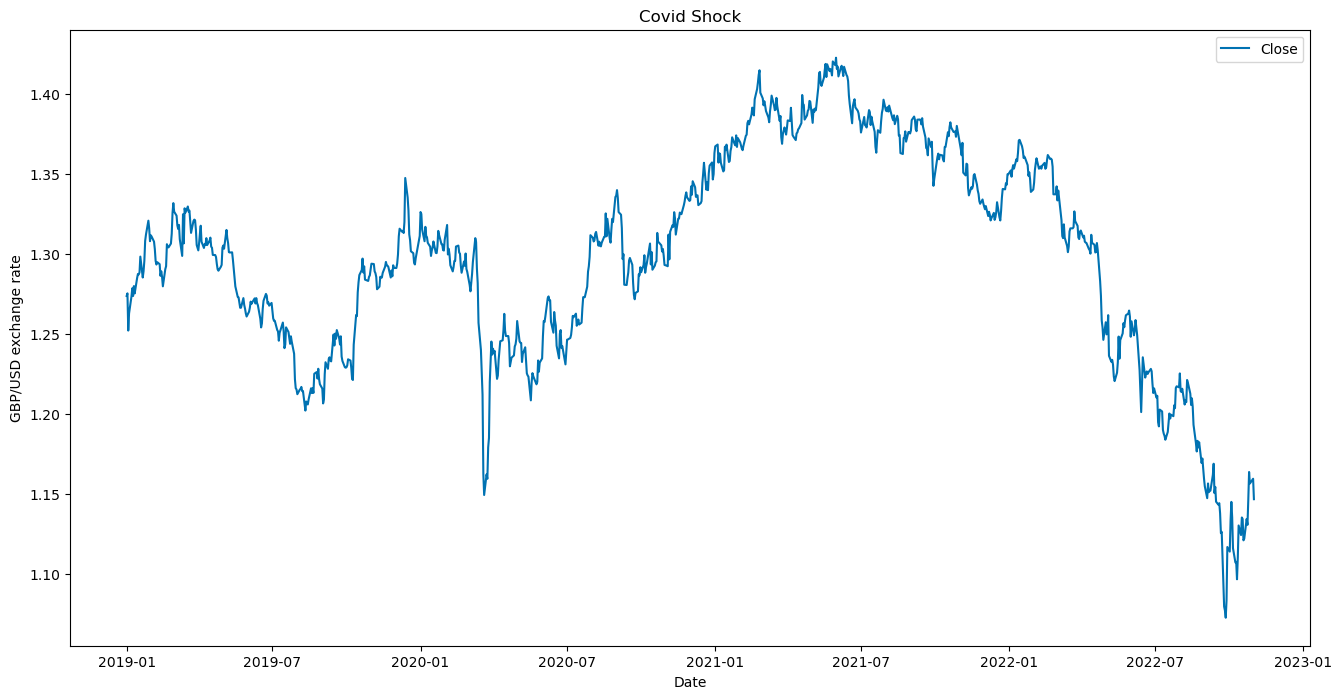

In [4]:
plt.figure(figsize=(16, 8))
plt.title('Covid Shock')
plt.plot(covid_gbpusd['Close'], label='Close')
plt.xlabel('Date')
plt.ylabel('GBP/USD exchange rate')
plt.legend()

In [ ]:
# The graph above suggests to zoom further in into the time frame of January 2020, where the 
# major fall happended until August/September 2020 when the market started to stabilise again.

In [5]:
covid_peek_gbpusd = web.DataReader("GBPUSD=X", "yahoo", start=datetime(2020, 1, 1),
                   end=datetime(2020, 8, 31),
                   )

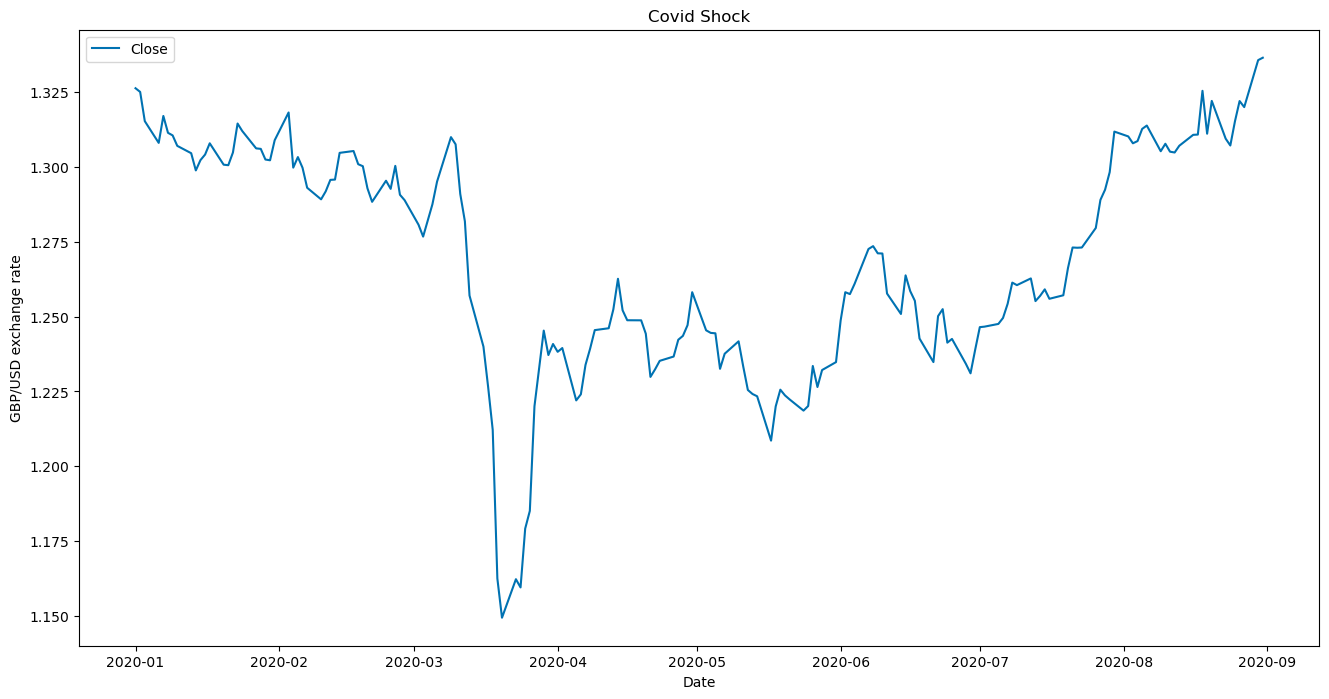

In [6]:
plt.figure(figsize=(16, 8))
plt.title('Covid Shock')
plt.plot(covid_peek_gbpusd['Close'], label='Close')
plt.xlabel('Date')
plt.ylabel('GBP/USD exchange rate')
plt.legend()

In [ ]:
# The next graph shows the big hit the currency exchange market suffered when COVID-19 virus
# affected the whole economy. The World Health Organization (WHO) on March 11, 2020 declared 
# the coronavirus (COVID-19) outbreak a global pandemic. 

# 15 June 2020 the non essential retails reopened. 
# 24 June 2020 the Government issued long-awaited guidance documents to pubs, bars, 
# restaurants, hotels and other licensed premises, detailing how licensed premises could 
# open safely whilst minimising the risk of spreading COVID-19 (applicable to England only).

In [7]:
allcovid = web.DataReader("GBPUSD=X", "yahoo", start=datetime(2000, 1, 1),
                   end=datetime(2022, 10, 31),
                   )

#allcovid['Currency'] = 'GBP'
allcovid.shape

(4920, 6)

In [8]:
gbp_brexit = web.DataReader("GBPUSD=X", "yahoo", start=datetime(2015, 1, 1),
                   end=datetime(2022, 10, 31),
                   )

gbp_brexit

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-01,1.558094,1.558094,1.558094,1.558094,0.0,1.558094
2015-01-02,1.558458,1.538746,1.558021,1.557972,0.0,1.557972
2015-01-05,1.532004,1.520612,1.528608,1.528491,0.0,1.528491
2015-01-06,1.527370,1.515795,1.525832,1.525832,0.0,1.525832
2015-01-07,1.515611,1.506796,1.513638,1.513798,0.0,1.513798
...,...,...,...,...,...,...
2022-10-25,1.162358,1.143419,1.146066,1.146224,0.0,1.146224
2022-10-26,1.164415,1.155095,1.163345,1.163819,0.0,1.163819
2022-10-27,1.160012,1.150616,1.156738,1.156604,0.0,1.156604


# Covid : Long Short-Term Memory Model

In [ ]:
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [9]:
gbptrain = web.DataReader("GBPUSD=X", "yahoo", start=datetime(2000, 1, 1),
                   end=datetime(2020, 2, 28), # as the Covid hit took place from March 2020
                   )

In [10]:
gbptrain.shape

(4223, 6)

In [11]:
gbptest = web.DataReader("GBPUSD=X", "yahoo", start=datetime(2021, 1, 1), # starting post covid shock date
                   end=datetime(2022, 10, 31), # up till now
                   )

In [12]:
gbptest.shape

(478, 6)

In [13]:
merged = pd.concat([gbptrain, gbptest], axis=0)
merged

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2003-12-01,1.727205,1.718390,1.723811,1.718597,0.0,1.718597
2003-12-02,1.732112,1.717298,1.719010,1.730313,0.0,1.730313
2003-12-03,1.731812,1.725209,1.730493,1.728101,0.0,1.728101
2003-12-04,1.728997,1.718302,1.727414,1.720697,0.0,1.720697
2003-12-05,1.733102,1.719809,1.720608,1.733102,0.0,1.733102
...,...,...,...,...,...,...
2022-10-25,1.162358,1.143419,1.146066,1.146224,0.0,1.146224
2022-10-26,1.164415,1.155095,1.163345,1.163819,0.0,1.163819
2022-10-27,1.160012,1.150616,1.156738,1.156604,0.0,1.156604


In [ ]:
# Using allcovid for close_prices
# training_data_len : everything up until 2021 January = pre shock
# test_data: everything from 2021 January = post shock

In [14]:
close_prices = allcovid['Close'] # 2000, 1, 1 - 2022, 10, 31,
values = close_prices.values
training_data_len = len(values[:-478])  # leaving out the recovery time period, startin 2021-1-1
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(values.reshape(-1,1))
train_data = scaled_data[0: training_data_len, :] #
x_train = []
y_train = []
    
    
for i in range(60, len(train_data)): #
    x_train.append(train_data[i-60:i, 0]) #
    y_train.append(train_data[i, 0]) #
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
test_data = scaled_data[4442:] #
x_test = []
#y_test = len(values[4442:])
y_test = values[4442:]   
    
for i in range(60, len(test_data)): #
    x_test.append(test_data[i-60:i, 0]) #

label_save= x_test    
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
#y_test

In [15]:
x_train.shape, x_test.shape

((4382, 60, 1), (418, 60, 1))

In [ ]:
### Setting up the machine learning network arhitecture

In [16]:
%%time
model = keras.Sequential()
model.add(layers.LSTM(100, return_sequences=True, input_shape=(x_train.shape[1], 1))) # return=True so the output of the layer will be another sequence of the same length
model.add(layers.LSTM(100, return_sequences=False)) # reture=false to only return the last output in the output sequence
model.add(layers.Dense(25))
model.add(layers.Dense(1))
model.summary()

2022-11-06 10:33:41.524835: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 100)           40800     
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 25)                2525      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 123,751
Trainable params: 123,751
Non-trainable params: 0
_________________________________________________________________
CPU times: user 1.12 s, sys: 48.1 ms, total: 1.16 s
Wall time: 1.58 s


In [17]:
%%time
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size= 30, epochs=20)

Epoch 1/20
147/147 [==============================] - 34s 167ms/step - loss: 0.0061
Epoch 2/20
147/147 [==============================] - 24s 165ms/step - loss: 4.0635e-04
Epoch 3/20
147/147 [==============================] - 32s 221ms/step - loss: 3.8701e-04
Epoch 4/20
147/147 [==============================] - 26s 177ms/step - loss: 3.7819e-04
Epoch 5/20
147/147 [==============================] - 25s 171ms/step - loss: 3.3208e-04
Epoch 6/20
147/147 [==============================] - 23s 157ms/step - loss: 3.4857e-04
Epoch 7/20
147/147 [==============================] - 27s 182ms/step - loss: 3.1066e-04
Epoch 8/20
147/147 [==============================] - 23s 155ms/step - loss: 3.1245e-04
Epoch 9/20
147/147 [==============================] - 29s 199ms/step - loss: 2.6640e-04
Epoch 10/20
147/147 [==============================] - 28s 194ms/step - loss: 2.6329e-04
Epoch 11/20
147/147 [==============================] - 24s 164ms/step - loss: 2.3576e-04
Epoch 12/20
147/147 [=============

In [19]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

14/14 [==============================] - 1s 71ms/step


0.0016499119932230394

# Shock analysis - LSTM Model 2

In [ ]:
# Running again the model with 2020-12-31 / 2021-1-1 split but different batch and epoch size

In [26]:
close_prices = allcovid['Close'] # 2000, 1, 1 - 2022, 10, 31,
values = close_prices.values
training_data_len = len(values[:-478]) # up until 2021-1-1
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(values.reshape(-1,1))
train_data = scaled_data[0: training_data_len, :] #
x_train = []
y_train = []
    
    
for i in range(60, len(train_data)): #
    x_train.append(train_data[i-60:i, 0]) #
    y_train.append(train_data[i, 0]) #
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
test_data = scaled_data[4442:] # using everything up til 2020-12-31
x_test = []
y_test = values[4442:]
    
    
for i in range(60, len(test_data)): #
    x_test.append(test_data[i-60:i, 0]) #
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [27]:
%%time
model2 = keras.Sequential()
model2.add(layers.LSTM(100, return_sequences=True, input_shape=(x_train.shape[1], 1))) # return=True so the output of the layer will be another sequence of the same length
model2.add(layers.LSTM(100, return_sequences=False)) # reture=false to only return the last output in the output sequence
model2.add(layers.Dense(25))
model2.add(layers.Dense(1))
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 60, 100)           40800     
                                                                 
 lstm_3 (LSTM)               (None, 100)               80400     
                                                                 
 dense_2 (Dense)             (None, 25)                2525      
                                                                 
 dense_3 (Dense)             (None, 1)                 26        
                                                                 
Total params: 123,751
Trainable params: 123,751
Non-trainable params: 0
_________________________________________________________________
CPU times: user 1.1 s, sys: 22.9 ms, total: 1.12 s
Wall time: 1.67 s


In [28]:
%%time
from tensorflow.keras.optimizers import *
optimizer = Adam(learning_rate=0.0001)
model2.compile(optimizer=optimizer, metrics=['mean_squared_error'], loss='mean_squared_error')
model2.fit(x_train, y_train, batch_size= 30, epochs=100)

#optimizer = Adam(learning_rate=0.0001)
#model.compile(loss='categorical_crossentropy',
#              optimizer=optimizer, 
#              metrics=['accuracy'])

Epoch 1/100
147/147 [==============================] - 33s 166ms/step - loss: 0.0158 - mean_squared_error: 0.0158
Epoch 2/100
147/147 [==============================] - 23s 157ms/step - loss: 6.0124e-04 - mean_squared_error: 6.0124e-04
Epoch 3/100
147/147 [==============================] - 23s 159ms/step - loss: 5.6159e-04 - mean_squared_error: 5.6159e-04
Epoch 4/100
147/147 [==============================] - 27s 181ms/step - loss: 5.4665e-04 - mean_squared_error: 5.4665e-04
Epoch 5/100
147/147 [==============================] - 24s 161ms/step - loss: 5.2737e-04 - mean_squared_error: 5.2737e-04
Epoch 6/100
147/147 [==============================] - 23s 154ms/step - loss: 5.1067e-04 - mean_squared_error: 5.1067e-04
Epoch 7/100
147/147 [==============================] - 22s 147ms/step - loss: 4.9474e-04 - mean_squared_error: 4.9474e-04
Epoch 8/100
147/147 [==============================] - 22s 146ms/step - loss: 4.6983e-04 - mean_squared_error: 4.6983e-04
Epoch 9/100
147/147 [===========

147/147 [==============================] - 23s 158ms/step - loss: 1.2942e-04 - mean_squared_error: 1.2942e-04
Epoch 68/100
147/147 [==============================] - 27s 184ms/step - loss: 1.3006e-04 - mean_squared_error: 1.3006e-04
Epoch 69/100
147/147 [==============================] - 29s 198ms/step - loss: 1.2995e-04 - mean_squared_error: 1.2995e-04
Epoch 70/100
147/147 [==============================] - 28s 192ms/step - loss: 1.2819e-04 - mean_squared_error: 1.2819e-04
Epoch 71/100
147/147 [==============================] - 25s 172ms/step - loss: 1.2831e-04 - mean_squared_error: 1.2831e-04
Epoch 72/100
147/147 [==============================] - 28s 190ms/step - loss: 1.2265e-04 - mean_squared_error: 1.2265e-04
Epoch 73/100
147/147 [==============================] - 28s 189ms/step - loss: 1.1976e-04 - mean_squared_error: 1.1976e-04
Epoch 74/100
147/147 [==============================] - 31s 208ms/step - loss: 1.1620e-04 - mean_squared_error: 1.1620e-04
Epoch 75/100
147/147 [=======

In [30]:
predictions2 = model2.predict(x_test)
predictions2 = scaler.inverse_transform(predictions2)
rmse = np.sqrt(np.mean(predictions2 - y_test)**2)
rmse

14/14 [==============================] - 1s 59ms/step


0.00913991321994937

In [ ]:
Evaluation of LSMT Shock Analysis: 
    
    0.0016499119932230394 rmse, batch_size 30 + epoch = 20 the better performing model
    0.00913991321994937 rmse
    
Both outputs of the shock analyis targeting the effects of Covid virus seem fairly acceptable. This project was 
carried out purely for eductional purposes, in which circumstances it does not serve as suggestion when to 
invest or when to buy. The rmse rates are quite low, generally speaking the models are performing well, although
there is still place for future improvement to better function on the forex market. 